In [1]:
import pandas as pd
import numpy as np

df_raw = pd.read_csv('./../dataset/one_revolution_paths.csv')

In [2]:
df_raw

,name,time_offset_s,x_au,y_au,z_au
0,1 MERCURY BARYCENTER,0.000000e+00,-7.114979e+05,-4.226030e+07,-3.389499e+06
1,1 MERCURY BARYCENTER,1.758340e+16,-4.936596e+05,-4.228673e+07,-3.411494e+06
2,1 MERCURY BARYCENTER,3.516680e+16,-2.757420e+05,-4.230638e+07,-3.432942e+06
3,1 MERCURY BARYCENTER,5.275021e+16,-5.778033e+04,-4.231925e+07,-3.453839e+06
4,1 MERCURY BARYCENTER,7.033361e+16,1.601906e+05,-4.232534e+07,-3.474184e+06
...,...,...,...,...,...
5595,999 PLUTO,1.358841e+22,1.265427e+09,-4.752101e+09,1.465826e+08
5596,999 PLUTO,1.365809e+22,1.467575e+09,-4.738875e+09,8.590988e+07
5597,999 PLUTO,1.372778e+22,1.667412e+09,-4.718183e+09,2.510138e+07
5598,999 PLUTO,1.379746e+22,1.864690e+09,-4.690245e+09,-3.574607e+07


In [3]:
print(df_raw['name'].unique())

['1 MERCURY BARYCENTER' '199 MERCURY' '2 VENUS BARYCENTER' '299 VENUS'
 '3 EARTH BARYCENTER' '301 MOON' '399 EARTH' '4 MARS BARYCENTER'
 '5 JUPITER BARYCENTER' '6 SATURN BARYCENTER' '601 MIMAS' '603 TETHYS'
 '604 DIONE' '605 RHEA' '607 HYPERION' '608 IAPETUS' '609 PHOEBE'
 '634 POLYDEUCES' '699 SATURN' '7 URANUS BARYCENTER'
 '8 NEPTUNE BARYCENTER' '9 PLUTO BARYCENTER' '901 CHARON' '902 NIX'
 '903 HYDRA' '904 KERBEROS' '905 STYX' '999 PLUTO']


In [4]:
planets = ['1 MERCURY BARYCENTER', '2 VENUS BARYCENTER', '3 EARTH BARYCENTER', '4 MARS BARYCENTER', '5 JUPITER BARYCENTER', '6 SATURN BARYCENTER', '7 URANUS BARYCENTER', '8 NEPTUNE BARYCENTER', '9 PLUTO BARYCENTER']
moons = ['301 MOON', '601 MIMAS', '603 TETHYS', '604 DIONE', '605 RHEA', '607 HYPERION', '608 IAPETUS', '609 PHOEBE', '634 POLYDEUCES', '901 CHARON', '902 NIX', '903 HYDRA', '904 KERBEROS', '905 STYX']
df = df_raw[df_raw['name'].isin(planets+moons)]
df = df.reset_index(drop=True)

In [5]:
df['planets_only'] = df['name'].replace({p:'other' for p in moons})
df['moons_only'] = df['name'].replace({p:'other' for p in planets})

In [6]:
df

,name,time_offset_s,x_au,y_au,z_au,planets_only,moons_only
0,1 MERCURY BARYCENTER,0.000000e+00,-7.114979e+05,-4.226030e+07,-3.389499e+06,1 MERCURY BARYCENTER,other
1,1 MERCURY BARYCENTER,1.758340e+16,-4.936596e+05,-4.228673e+07,-3.411494e+06,1 MERCURY BARYCENTER,other
2,1 MERCURY BARYCENTER,3.516680e+16,-2.757420e+05,-4.230638e+07,-3.432942e+06,1 MERCURY BARYCENTER,other
3,1 MERCURY BARYCENTER,5.275021e+16,-5.778033e+04,-4.231925e+07,-3.453839e+06,1 MERCURY BARYCENTER,other
4,1 MERCURY BARYCENTER,7.033361e+16,1.601906e+05,-4.232534e+07,-3.474184e+06,1 MERCURY BARYCENTER,other
...,...,...,...,...,...,...,...
4595,905 STYX,1.410319e+22,1.369000e+09,-4.735914e+09,1.576047e+08,other,905 STYX
4596,905 STYX,1.417551e+22,1.577732e+09,-4.722636e+09,8.659737e+07,other,905 STYX
4597,905 STYX,1.424784e+22,1.783817e+09,-4.701431e+09,1.544411e+07,other,905 STYX
4598,905 STYX,1.432016e+22,1.986996e+09,-4.672559e+09,-5.573491e+07,other,905 STYX


In [7]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# Planet model

In [9]:
X = df[['x_au', 'y_au', 'z_au']]
y = df['planets_only']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

rf_planet = RandomForestClassifier(n_estimators=100, random_state=42, verbose=1, n_jobs=-1)
rf_planet.fit(X_train, y_train)

y_pred = rf_planet.predict(X_test)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 20 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=20)]: Using backend ThreadingBackend with 20 concurrent workers.
[Parallel(n_jobs=20)]: Done  10 tasks      | elapsed:    0.0s
[Parallel(n_jobs=20)]: Done 100 out of 100 | elapsed:    0.0s finished


[Parallel(n_jobs=20)]: Using backend ThreadingBackend with 20 concurrent workers.
[Parallel(n_jobs=20)]: Done  10 tasks      | elapsed:    0.0s
[Parallel(n_jobs=20)]: Done 100 out of 100 | elapsed:    0.0s finished


                      precision    recall  f1-score   support

1 MERCURY BARYCENTER       0.87      1.00      0.93        40
  2 VENUS BARYCENTER       1.00      0.90      0.95        40
  3 EARTH BARYCENTER       1.00      1.00      1.00        40
   4 MARS BARYCENTER       0.90      0.93      0.91        40
5 JUPITER BARYCENTER       1.00      0.93      0.96        40
 6 SATURN BARYCENTER       0.85      0.82      0.84        40
 7 URANUS BARYCENTER       1.00      1.00      1.00        40
8 NEPTUNE BARYCENTER       1.00      1.00      1.00        40
  9 PLUTO BARYCENTER       0.55      0.40      0.46        40
               other       0.95      0.97      0.96       560

            accuracy                           0.93       920
           macro avg       0.91      0.89      0.90       920
        weighted avg       0.93      0.93      0.93       920

Training Accuracy: 1.00
Validation Accuracy: 0.93


[Parallel(n_jobs=20)]: Using backend ThreadingBackend with 20 concurrent workers.
[Parallel(n_jobs=20)]: Done  10 tasks      | elapsed:    0.0s
[Parallel(n_jobs=20)]: Done 100 out of 100 | elapsed:    0.0s finished


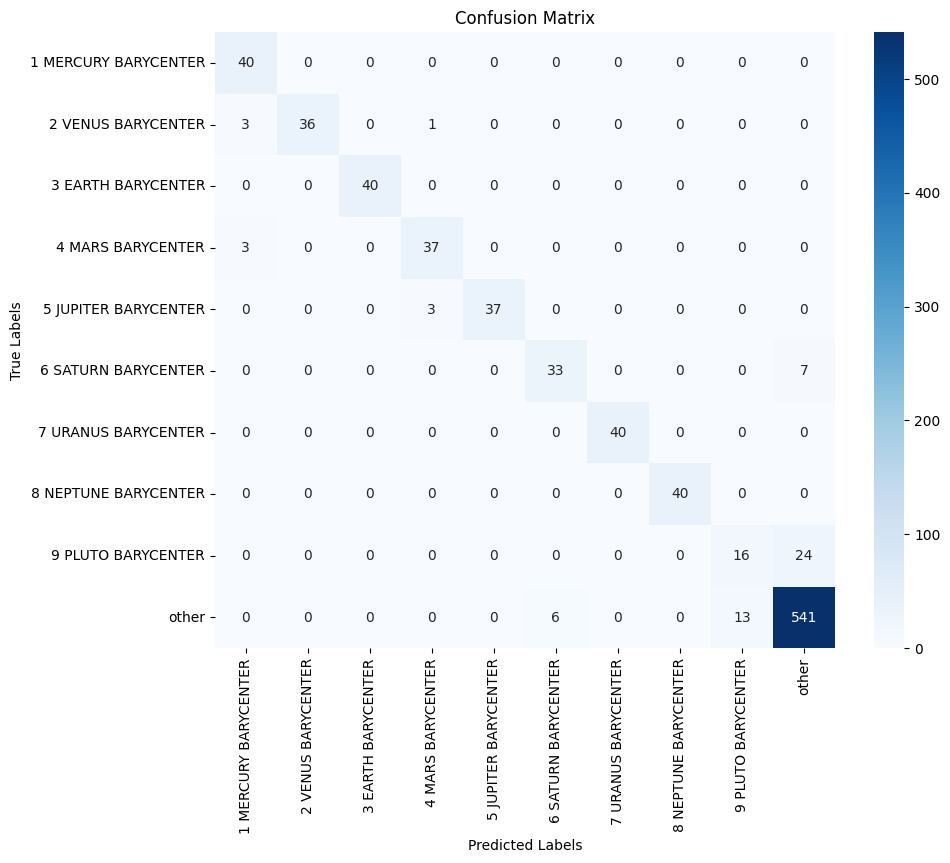

In [10]:

print(classification_report(y_test, y_pred))
print(f"Training Accuracy: {rf_planet.score(X_train, y_train):.2f}")
print(f"Validation Accuracy: {rf_planet.score(X_test, y_test):.2f}")

class_names = sorted(df['planets_only'].unique())
plt.figure(figsize=(10, 8))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap='Blues', fmt='d',xticklabels=class_names, yticklabels=class_names)

plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

# Moon model

In [11]:
X = df[['x_au', 'y_au', 'z_au']]
y = df['moons_only']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

rf_moon = RandomForestClassifier(n_estimators=100, random_state=42, verbose=1, n_jobs=-1)
rf_moon.fit(X_train, y_train)

y_pred = rf_moon.predict(X_test)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 20 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=20)]: Using backend ThreadingBackend with 20 concurrent workers.
[Parallel(n_jobs=20)]: Done  10 tasks      | elapsed:    0.0s
[Parallel(n_jobs=20)]: Done 100 out of 100 | elapsed:    0.0s finished


[Parallel(n_jobs=20)]: Using backend ThreadingBackend with 20 concurrent workers.
[Parallel(n_jobs=20)]: Done  10 tasks      | elapsed:    0.0s
[Parallel(n_jobs=20)]: Done 100 out of 100 | elapsed:    0.0s finished


                precision    recall  f1-score   support

      301 MOON       1.00      0.97      0.99        40
     601 MIMAS       0.89      1.00      0.94        40
    603 TETHYS       0.97      0.95      0.96        40
     604 DIONE       1.00      0.95      0.97        40
      605 RHEA       0.97      0.97      0.97        40
  607 HYPERION       0.95      0.97      0.96        40
   608 IAPETUS       0.95      0.88      0.91        40
    609 PHOEBE       0.79      0.95      0.86        40
634 POLYDEUCES       0.93      0.97      0.95        40
    901 CHARON       0.64      0.68      0.66        40
       902 NIX       0.50      0.55      0.52        40
     903 HYDRA       0.83      0.62      0.71        40
  904 KERBEROS       0.49      0.53      0.51        40
      905 STYX       0.70      0.57      0.63        40
         other       0.90      0.90      0.90       360

      accuracy                           0.86       920
     macro avg       0.83      0.83      0.83 

[Parallel(n_jobs=20)]: Using backend ThreadingBackend with 20 concurrent workers.
[Parallel(n_jobs=20)]: Done  10 tasks      | elapsed:    0.0s
[Parallel(n_jobs=20)]: Done 100 out of 100 | elapsed:    0.0s finished


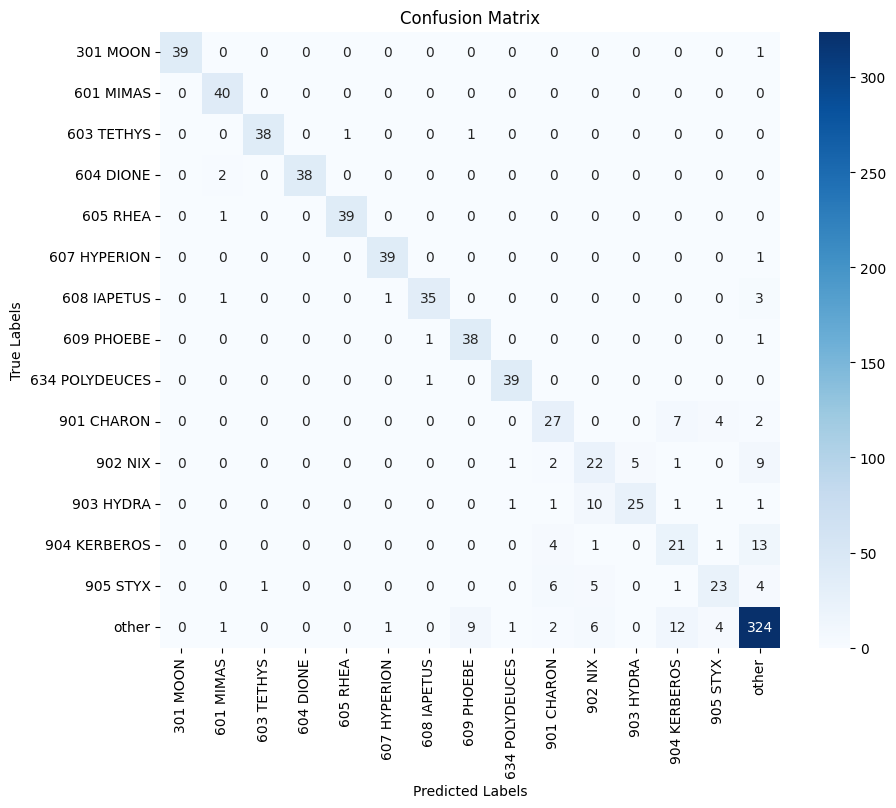

In [12]:
print(classification_report(y_test, y_pred))
print(f"Training Accuracy: {rf_moon.score(X_train, y_train):.2f}")
print(f"Validation Accuracy: {rf_moon.score(X_test, y_test):.2f}")

class_names = sorted(df['moons_only'].unique())
plt.figure(figsize=(10, 8))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap='Blues', fmt='d',xticklabels=class_names, yticklabels=class_names)

plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

# Combining both models

In [13]:
df['pred'] = rf_planet.predict(df[['x_au', 'y_au', 'z_au']])

[Parallel(n_jobs=20)]: Using backend ThreadingBackend with 20 concurrent workers.
[Parallel(n_jobs=20)]: Done  10 tasks      | elapsed:    0.0s
[Parallel(n_jobs=20)]: Done 100 out of 100 | elapsed:    0.0s finished


In [14]:
df.loc[df['pred'] == 'other', 'pred'] = rf_moon.predict(df.loc[df['pred'] == 'other', ['x_au', 'y_au', 'z_au']])

[Parallel(n_jobs=20)]: Using backend ThreadingBackend with 20 concurrent workers.
[Parallel(n_jobs=20)]: Done  10 tasks      | elapsed:    0.0s
[Parallel(n_jobs=20)]: Done 100 out of 100 | elapsed:    0.0s finished


In [15]:
accuracy = accuracy_score(df['name'], df['pred'])
print(f"Accuracy Score: {accuracy:.2f}")

Accuracy Score: 0.97


c:\ARF\my-repos\RBL-AnalisisData-ML\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\ARF\my-repos\RBL-AnalisisData-ML\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\ARF\my-repos\RBL-AnalisisData-ML\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


                      precision    recall  f1-score   support

1 MERCURY BARYCENTER       0.97      1.00      0.99       200
  2 VENUS BARYCENTER       1.00      0.98      0.99       200
  3 EARTH BARYCENTER       1.00      1.00      1.00       200
            301 MOON       1.00      0.99      1.00       200
   4 MARS BARYCENTER       0.98      0.98      0.98       200
5 JUPITER BARYCENTER       1.00      0.98      0.99       200
 6 SATURN BARYCENTER       0.97      0.96      0.97       200
           601 MIMAS       0.98      1.00      0.99       200
          603 TETHYS       0.99      0.99      0.99       200
           604 DIONE       1.00      0.99      0.99       200
            605 RHEA       0.99      0.99      0.99       200
        607 HYPERION       0.99      0.99      0.99       200
         608 IAPETUS       0.99      0.97      0.98       200
          609 PHOEBE       0.99      0.96      0.98       200
      634 POLYDEUCES       0.99      0.99      0.99       200
 7 URAN

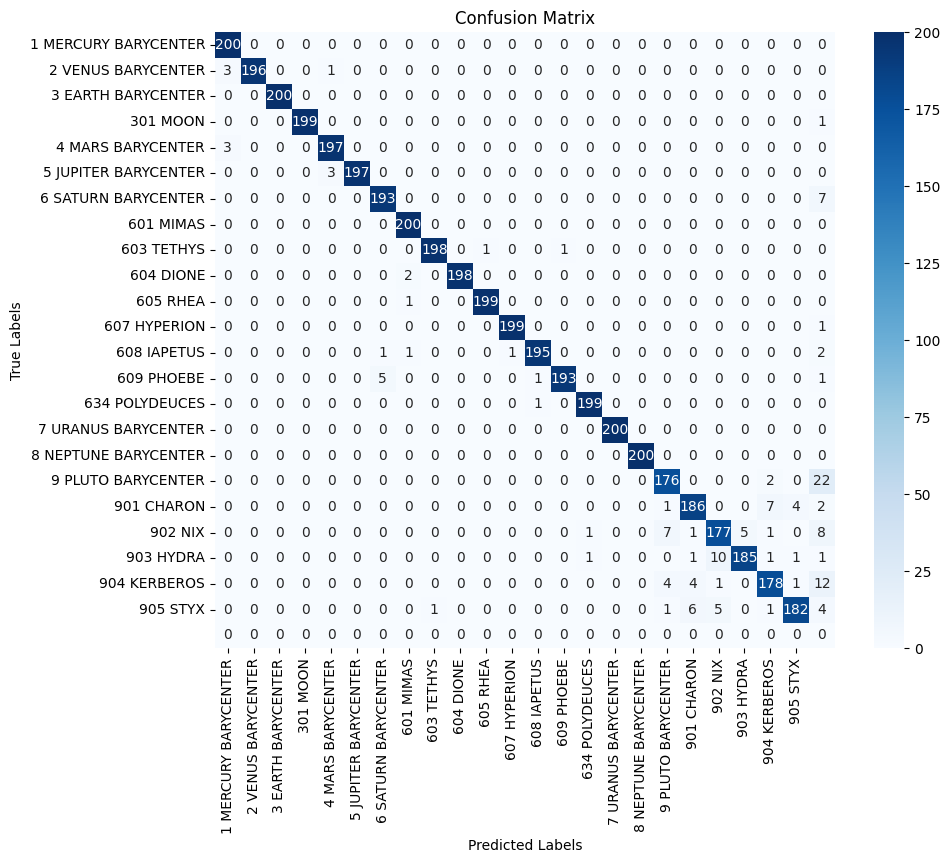

In [16]:
print(classification_report(df['name'], df['pred']))

class_names = sorted(moons+planets)
plt.figure(figsize=(10, 8))
sns.heatmap(confusion_matrix(df['name'], df['pred']), annot=True, cmap='Blues', fmt='d',xticklabels=class_names, yticklabels=class_names)

plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()